In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the Data

In [89]:
df= pd.read_excel (r'Miscarriage.xlsx')

# Read the data

In [90]:
df.sample(5)

,Age,BMI,Nmisc,Activity,Biking,Walking,Driving,Sitting,Location,temp,bpm,stress,bp,Alcohol_Consumption,Drunk,Miscarriage/ No Miscarriage
75079,22,"26,5300209",2,1,1,0,0,0,4,40,115,0,2,353,2,0
787683,32,"18,82775677",0,1,0,1,0,0,1,35,54,1,0,632,2,1
604379,29,"25,24631021",1,1,1,0,0,1,3,38,77,1,0,498,2,1
145321,23,"25,67421378",0,1,0,1,0,0,3,39,167,0,2,274,2,0
588246,29,"23,1067924",3,1,0,1,0,0,2,37,167,0,2,443,2,1


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   Age                          1000000 non-null  int64 
 1   BMI                          1000000 non-null  object
 2   Nmisc                        1000000 non-null  int64 
 3   Activity                     1000000 non-null  int64 
 4   Biking                       1000000 non-null  int64 
 5   Walking                      1000000 non-null  int64 
 6   Driving                      1000000 non-null  int64 
 7   Sitting                      1000000 non-null  int64 
 8   Location                     1000000 non-null  int64 
 9   temp                         1000000 non-null  int64 
 10  bpm                          1000000 non-null  int64 
 11  stress                       1000000 non-null  int64 
 12  bp                           1000000 non-null  int64 
 13

In [92]:
df.shape

(1000000, 16)

# Data Cleaning:

In [93]:
df.duplicated().sum()

74

In [94]:
df.drop_duplicates(keep='last',inplace=True)

In [95]:
df.Activity.value_counts()

1    999926
Name: Activity, dtype: int64

In [96]:
df.drop(['Activity'],axis=1 , inplace = True)

In [97]:
df["BMI"]=df.BMI.str.replace(',', '.')

In [98]:
df["BMI"] = df.BMI.astype(float)

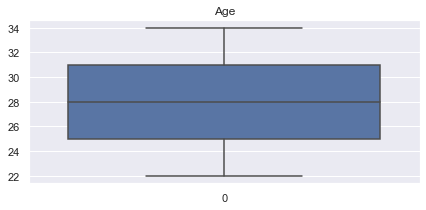

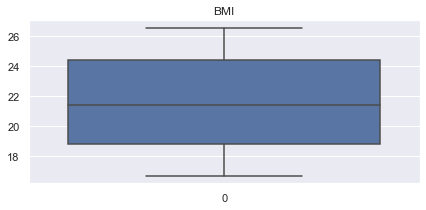

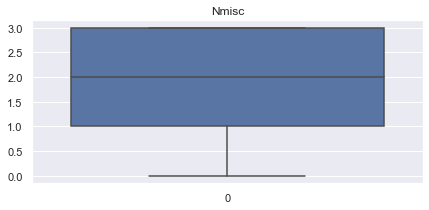

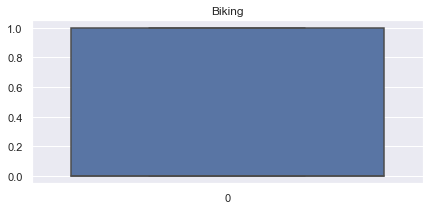

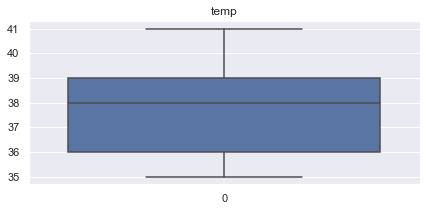

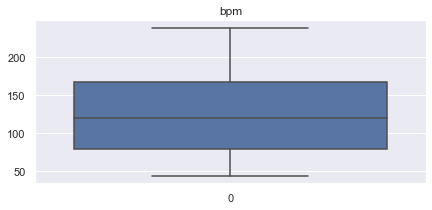

In [99]:
columns={'Age':'Age','BMI':'BMI','Nmisc':'Nmisc','Biking':'Biking','temp':'temp','bpm':'bpm'}
sns.set(rc={'figure.figsize':(7,3)})
for key, value in columns.items():
    sns.boxplot(data=df[key])
    plt.title(value)
    plt.show()

In [100]:
df["Miscarriage/ No Miscarriage"].value_counts()#balance

0    500530
1    499396
Name: Miscarriage/ No Miscarriage, dtype: int64

In [101]:
df.shape

(999926, 15)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999926 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Age                          999926 non-null  int64  
 1   BMI                          999926 non-null  float64
 2   Nmisc                        999926 non-null  int64  
 3   Biking                       999926 non-null  int64  
 4   Walking                      999926 non-null  int64  
 5   Driving                      999926 non-null  int64  
 6   Sitting                      999926 non-null  int64  
 7   Location                     999926 non-null  int64  
 8   temp                         999926 non-null  int64  
 9   bpm                          999926 non-null  int64  
 10  stress                       999926 non-null  int64  
 11  bp                           999926 non-null  int64  
 12  Alcohol_Consumption          999926 non-null  int64  
 13 

# Split the data into : Train set and Test set

In [103]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [104]:
train_set.shape

(799940, 15)

In [105]:
test_set.shape

(199986, 15)

In [106]:
df = train_set.copy()

In [130]:
df.sample(5)

,Age,BMI,Nmisc,Biking,Walking,Driving,Sitting,Location,temp,bpm,stress,bp,Alcohol_Consumption,Drunk,Miscarriage/ No Miscarriage
717732,31,19.683564,1,0,1,0,0,4,39,167,0,2,598,2,0
889506,33,22.250985,0,1,0,0,1,4,36,75,3,0,299,2,1
169075,24,18.399853,1,1,0,0,0,1,39,90,2,1,245,1,1
582978,29,22.250985,3,0,1,0,1,0,39,135,0,2,322,2,1
290113,25,24.390503,0,1,0,0,1,3,39,209,2,3,760,2,1


# visualization

In [107]:
subset = df.sample(n=100,replace="False")

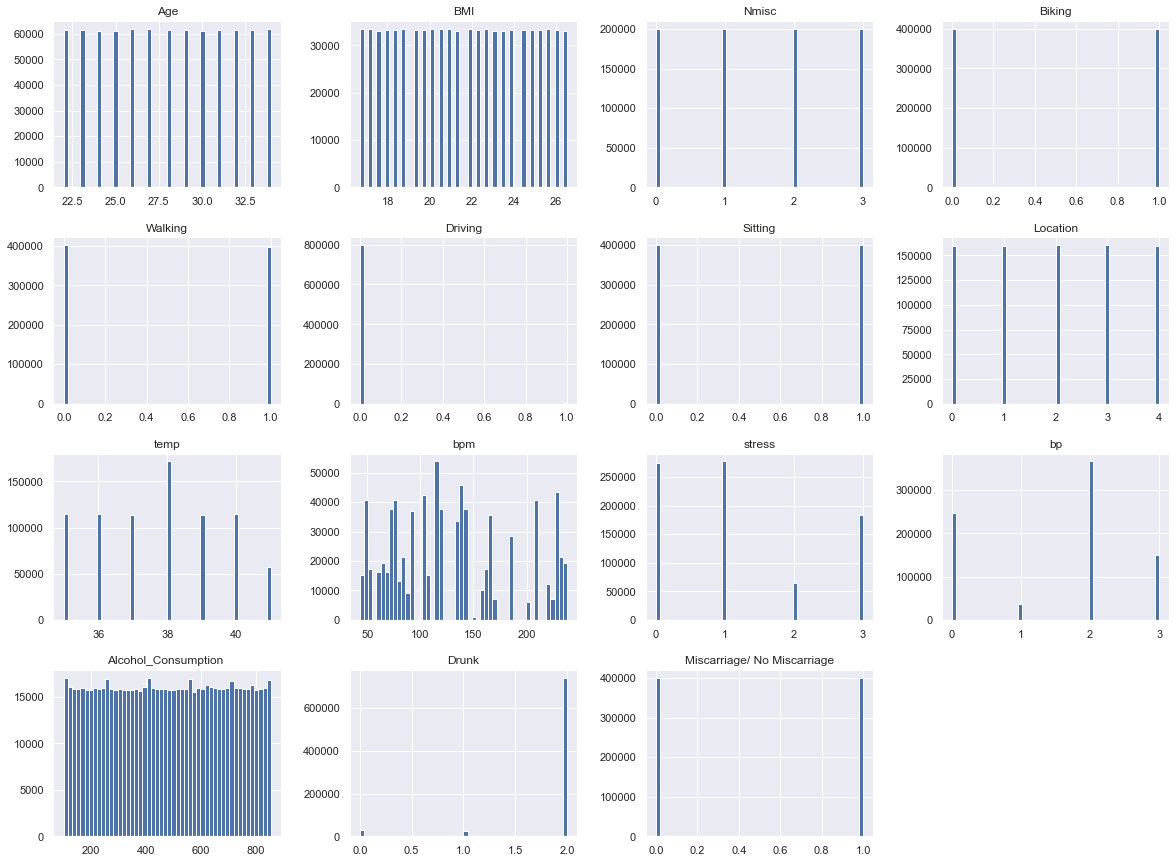

In [108]:
df.hist(bins=50, figsize=(20,15));

C:\Users\mms-1\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\mms-1\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


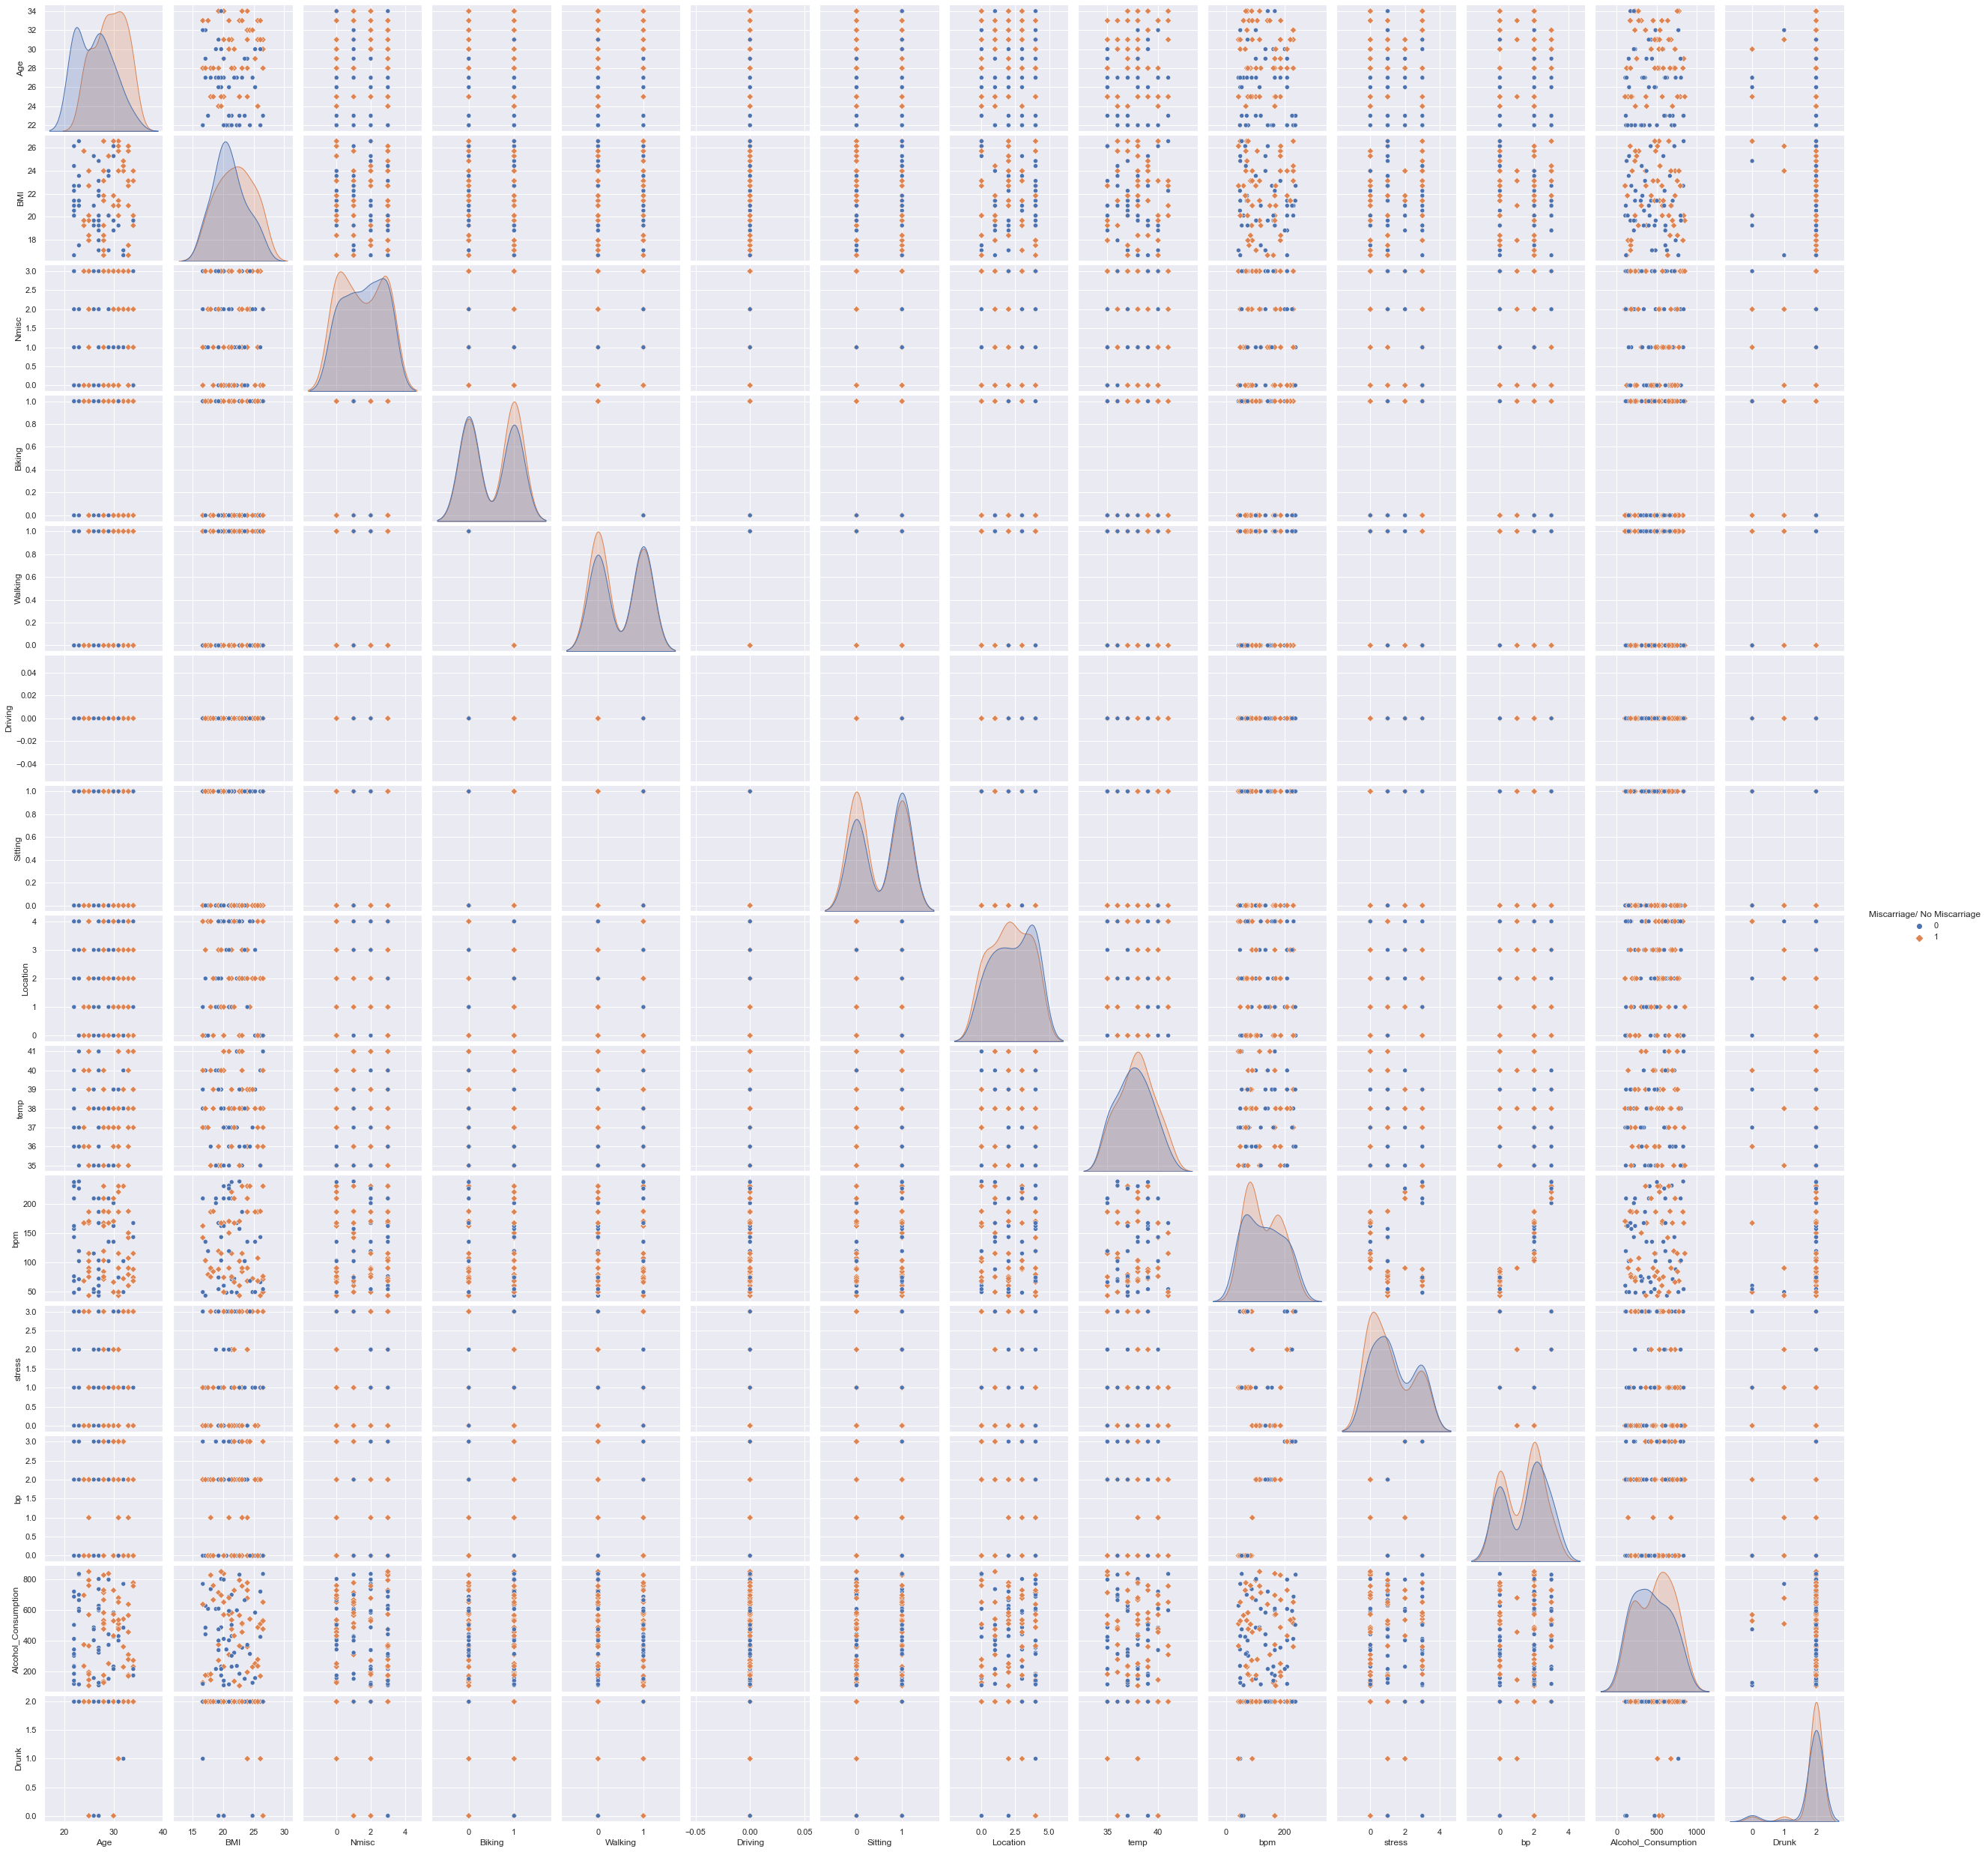

In [109]:
sns.pairplot(subset, hue="Miscarriage/ No Miscarriage", markers=["o", "D"]);

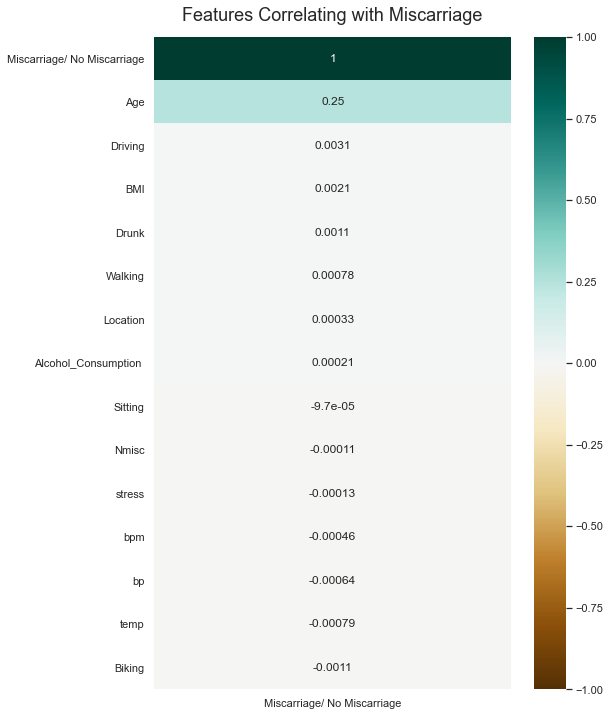

In [110]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Miscarriage/ No Miscarriage']].sort_values(by='Miscarriage/ No Miscarriage', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Miscarriage', fontdict={'fontsize':18}, pad=16);

# Model

In [111]:
X, y = df.drop('Miscarriage/ No Miscarriage',axis=1), df['Miscarriage/ No Miscarriage']

In [112]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [113]:
X_test, y_test = test_set.drop('Miscarriage/ No Miscarriage',axis=1), test_set['Miscarriage/ No Miscarriage']

# -Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
logreg = LogisticRegression(penalty='none')
logreg.fit(X_train, y_train)
lr_pred = logreg.predict(X_train)
print(accuracy_score(y_train, lr_pred))


0.5947962763873957


C:\Users\mms-1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# -Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
decisiontree = DecisionTreeClassifier(max_depth=4)
decisiontree.fit(X_train, y_train)
decisiontree.score(X_val, y_val)

0.8080056004200316

# -Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

In [117]:
randomforest = RandomForestClassifier(n_estimators=15)
quick_test_afew_times(randomforest, X, y)

0.8068342625696928

# -KNN

# simple validation

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)#اسوي فندلشن عشان الكي الهايبر بارميتر
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
print(metrics.accuracy_score(y_val, y_pred))

0.5959396954771607


# cross validation

In [119]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.60487037 0.60630797 0.60629547 0.60478286 0.60455784 0.6039953
 0.60393279 0.60562042 0.60510788 0.60483286]


In [120]:
print(scores.mean())

0.6050303772782958


# -xgboost

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_val, gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit)) 

C:\Users\mms-1\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mms-1\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


0.8080056004200316

# -SVM

In [122]:
subset1 = df.sample(n=20000,replace="False")
X1, y1 = subset1.drop('Miscarriage/ No Miscarriage',axis=1), subset1['Miscarriage/ No Miscarriage']
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=.25, random_state=3)

In [123]:
from sklearn import svm
from sklearn.metrics import accuracy_score
svm_model = svm.SVC(kernel="linear").fit(X_train1, y_train1)
CP=svm_model.predict(X_val1)
accuracy_score(y_val1,CP)

0.586

# -GaussianNB

In [124]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_val, y_val)

0.6530489786734005

# compare between models

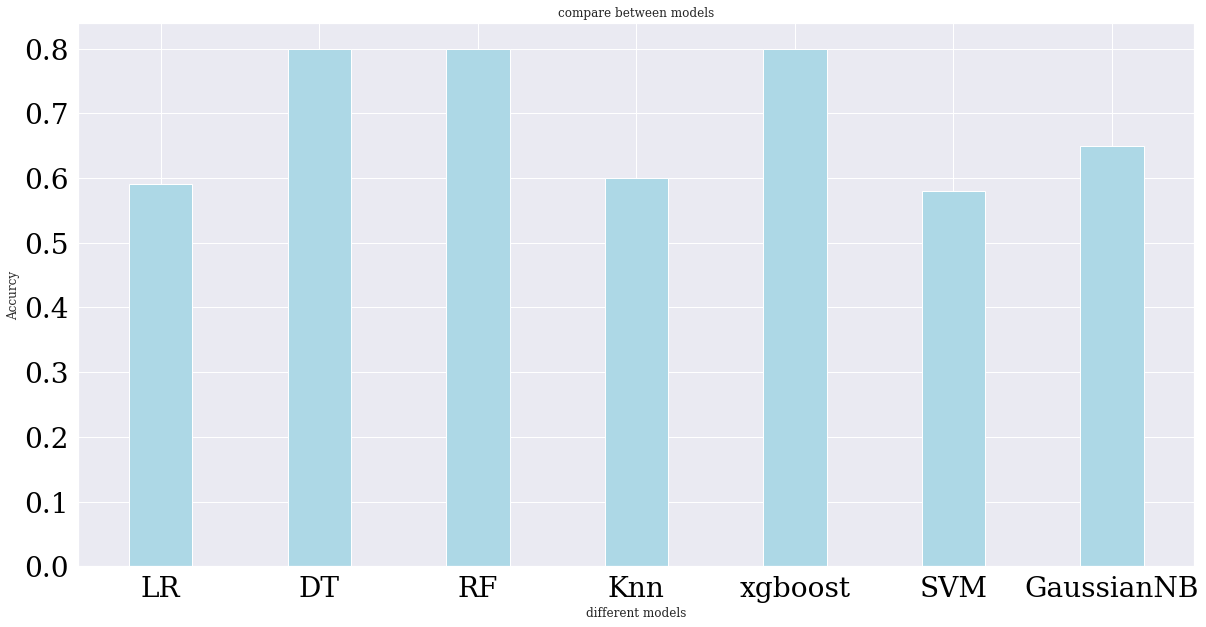

In [133]:
data = {'LR':0.59, 'DT':0.80, 'RF':0.80,
        'Knn':0.60,'xgboost':0.80,'SVM':0.58,'GaussianNB':0.65}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(courses, values, color ='lightblue',
        width = 0.4)
plt.xticks(rotation='horizontal')
plt.rc('xtick', labelsize=28,color ="#000000") 
plt.rc('ytick', labelsize=28,color ="#000000")
plt.rcParams["font.family"] = "serif"
plt.xlabel("different models")
plt.ylabel("Accurcy")
plt.title("compare between models")
plt.show()

# -Final Model

In [126]:
decisiontree = DecisionTreeClassifier(max_depth=4)
decisiontree.fit(X, y)
lr_pred2 = decisiontree.predict(X_test)
print(accuracy_score(y_test, lr_pred2))
print(f1_score(y_test, lr_pred2))
print(recall_score(y_test, lr_pred2))
print(precision_score(y_test, lr_pred2))

0.8074665226565859
0.8384790925565474
1.0
0.7218803270636502


<AxesSubplot:>

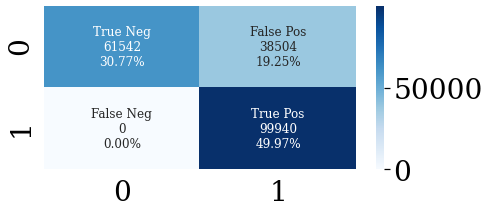

In [127]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, lr_pred2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [136]:
n1 = int(input('Enter yor age : '))
n2 = int(input('Enter your BMI: '))
n3 = int(input('Have you ever had an abortion? If not, enter = 0 If yes, enter the number of abortions :'))
n5 = int(input('Do you ride a bike? if yes enter = 1 if no enter = 0 : '))
n6 = int(input('Do you do walking exercises? if yes enter = 1 if no enter = 0 : '))
n7 = int(input('Do you drive? if yes enter = 1 if no enter = 0 :'))
n8 = int(input('Do you keep sitting for a long time? if yes enter = 1 if no enter = 0 :'))
n9 = int(input('Enter the Location number? from 0 to 4 :'))
n10 = int(input('Enter your temperature? :'))
n11 = int(input('Enter your BPM? :'))
n12 = int(input('Enter your stress? :'))
n13 = int(input('Enter your BP? :'))
n15 = int(input('Enter the number of times you drank alcohol in a day ? :'))
n14 = int(input('Enter percentage of alcohol in your body ? :'))
decisiontree.fit(X, y)
result=decisiontree.predict([[n1, n2, n3,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15]])
print('your expectation:', result)

Enter yor age : 32
Enter your BMI: 23
Have you ever had an abortion? If not, enter = 0 If yes, enter the number of abortions :2
Do you ride a bike? if yes enter = 1 if no enter = 0 : 1
Do you do walking exercises? if yes enter = 1 if no enter = 0 : 1
Do you drive? if yes enter = 1 if no enter = 0 :0
Do you keep sitting for a long time? if yes enter = 1 if no enter = 0 :0
Enter the Location number? from 0 to 4 :2
Enter your temperature? :40
Enter your BPM? :227
Enter your stress? :2
Enter your BP? :3
Enter the number of times you drank alcohol in a day ? :2
Enter percentage of alcohol in your body ? :573
your expectation: [1]
